# Modif CSV

In [2]:
import pandas as pd

# Load the CSV file
df = pd.read_csv(r"C:\Users\krish\ai-power-converter\machine-learning\simulation_results_8000.csv")

# Specify the columns you want to remove
columns_to_remove = ["No"]  # Specify the columns you want to remove

# Drop the specified columns
df_truncated = df.drop(columns=columns_to_remove)

# Save the truncated DataFrame back to a CSV file
df_truncated.to_csv("modified_8000_dataset.csv", index=False)


# Scalarization

In [23]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the CSV file
df = pd.read_csv(r"C:\Users\krish\ai-power-converter\machine-learning\modified_dataset.csv")

# Select only the input features (L, C, fsw)
input_features = df[["L", "C", "fsw"]]

# Apply scalarization to input features
scaler = MinMaxScaler()
input_scaled = scaler.fit_transform(input_features)

# Create a DataFrame with the scaled input features
df_input_scaled = pd.DataFrame(input_scaled, columns=["L_scaled", "C_scaled", "fsw_scaled"])

# Concatenate the scaled input features with the remaining columns
df_processed = pd.concat([df_input_scaled, df.drop(columns=["L", "C", "fsw"])], axis=1)

# Save the DataFrame with scaled input features to a new CSV file
df_processed.to_csv("processed_dataset.csv", index=False)


# Machine Learning

## 1

In [11]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv(r"C:\Users\krish\ai-power-converter\machine-learning\modified_dataset.csv")

# Select input features (L, C, fsw)
X = df[['L', 'C', 'fsw']].values

# Scale input features to range [0, 1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Output features
y = df[["delta_current_percentage", "delta_voltage_percentage", "switching_loss", "capacitor_loss", "inductor_copper_loss"]].values

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define model architecture
model = tf.keras.Sequential([
    tf.keras.layers.BatchNormalization(input_shape=(3,)),  # Scalarization layer
    tf.keras.layers.Dense(64, activation='relu'),          # Hidden layer 1
    tf.keras.layers.BatchNormalization(),                  # Batch normalization
    tf.keras.layers.Dense(64, activation='relu'),          # Hidden layer 2
    tf.keras.layers.BatchNormalization(),                  # Batch normalization
    tf.keras.layers.Dense(64, activation='relu'),          # Hidden layer 3
    tf.keras.layers.BatchNormalization(),                  # Batch normalization
    tf.keras.layers.Dense(5)                               # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with validation data
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

# Optionally, save the model
model.save("power_converter_model.h5")


KeyboardInterrupt: 

In [20]:
# Length of training data
print("Length of X_train:", len(X_train))
print("Length of y_train:", len(y_train))

# Length of validation data
print("Length of X_val:", len(X_val))
print("Length of y_val:", len(y_val))

# Length of testing data
print("Length of X_test:", len(X_test))
print("Length of y_test:", len(y_test))

Length of X_train: 700
Length of y_train: 700
Length of X_val: 150
Length of y_val: 150
Length of X_test: 150
Length of y_test: 150


In [ ]:
# Evaluate the model on the testing set
mse = model.evaluate(X_test, y_test)

# Alternatively, you can make predictions and then compute metrics
y_pred = model.predict(X_test)

# Compute Mean Squared Error (MSE)
mse = tf.keras.losses.mean_squared_error(y_test, y_pred).numpy()

# Compute Mean Absolute Error (MAE)
mae = tf.keras.losses.mean_absolute_error(y_test, y_pred).numpy()

# Compute R-squared (R2) score
r2 = 1 - (mse / np.var(y_test))

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)


## 2

Epoch 1/50
175/175 [==============================] - 1s 2ms/step - loss: 1.4457 - val_loss: 1.3643
Epoch 2/50
175/175 [==============================] - 0s 960us/step - loss: 0.7144 - val_loss: 0.8571
Epoch 3/50
175/175 [==============================] - 0s 941us/step - loss: 0.5627 - val_loss: 0.4257
Epoch 4/50
175/175 [==============================] - 0s 946us/step - loss: 0.4412 - val_loss: 0.4157
Epoch 5/50
175/175 [==============================] - 0s 926us/step - loss: 0.4058 - val_loss: 0.3117
Epoch 6/50
175/175 [==============================] - 0s 940us/step - loss: 0.4085 - val_loss: 0.3095
Epoch 7/50
175/175 [==============================] - 0s 960us/step - loss: 0.3907 - val_loss: 0.2889
Epoch 8/50
175/175 [==============================] - 0s 922us/step - loss: 0.3775 - val_loss: 0.2302
Epoch 9/50
175/175 [==============================] - 0s 951us/step - loss: 0.3374 - val_loss: 0.2766
Epoch 10/50
175/175 [==============================] - 0s 946us/step - loss: 0.3696 

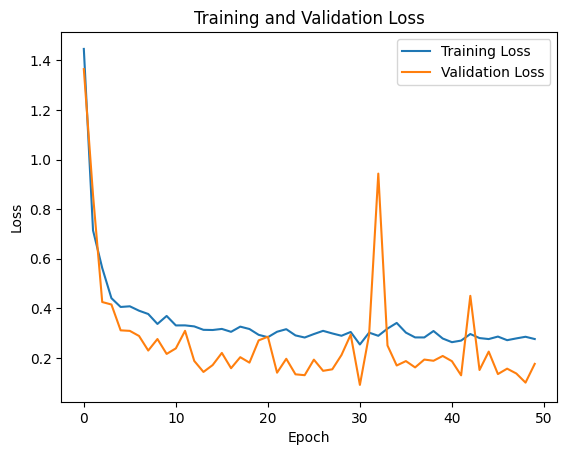

In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt

# Load your simulation data
# Replace "your_dataset.csv" with the path to your dataset
df = pd.read_csv(r"D:\Krishna\ai-power-converter\machine-learning\modified_8000_dataset.csv")

# Extract input features (L, C, fsw)
X = df[['L', 'C', 'fsw']].values

# Extract output (ripples)
y = df[["delta_current", "delta_voltage", "Pl_s1", "Pl_s2", "Pl_C", "Pl_L_Cu"]].values  # Adjust column names as per your dataset

# Scale input features to range [0, 1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define a custom callback to print custom information at the end of each epoch
class PrintEpochInfo(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch+1}/{self.params['epochs']}, Loss: {logs['loss']}, Val Loss: {logs['val_loss']}")

# Define the neural network model
# model = tf.keras.Sequential([
#     tf.keras.layers.BatchNormalization(input_shape=(3,)),  # Scalarization layer
#     tf.keras.layers.Dense(64, activation='relu'),          # Hidden layer 1
#     tf.keras.layers.BatchNormalization(),                  # Batch normalization
#     tf.keras.layers.Dense(64, activation='relu'),          # Hidden layer 2
#     tf.keras.layers.BatchNormalization(),                  # Batch normalization
#     tf.keras.layers.Dense(64, activation='relu'),          # Hidden layer 3
#     tf.keras.layers.BatchNormalization(),                  # Batch normalization
#     tf.keras.layers.Dense(6)                               # Output layer with 3 neurons
# ])

model = tf.keras.Sequential([
    tf.keras.layers.BatchNormalization(input_shape=(3,)),  # Scalarization layer
    tf.keras.layers.Dense(64, activation='relu'),          # Hidden layer 1
    tf.keras.layers.BatchNormalization(),                  # Batch normalization
    tf.keras.layers.Dense(64, activation='relu'),          # Hidden layer 2
    tf.keras.layers.BatchNormalization(),                  # Batch normalization
    tf.keras.layers.Dense(64, activation='relu'),          # Hidden layer 2
    tf.keras.layers.BatchNormalization(),     
    tf.keras.layers.Dense(6, activation='softplus')                               # Output layer with 6 neurons
])


# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with custom callback to print information at the end of each epoch
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[PrintEpochInfo()], verbose=1)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [17]:
# Evaluate the model on the testing set
mse = model.evaluate(X_test, y_test)
print("Mean Squared Error on Testing Set:", mse)

# Optionally, save the model
model.save("ripples_prediction_model.h5")


5/5 [==============================] - 0s 3ms/step - loss: 0.3859
Mean Squared Error on Testing Set: 0.38587820529937744


c:\Users\krish\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [7]:
# Use the trained model to make predictions on the testing set
predictions = model.predict(X_test)

# Print the first few predictions
print("Predictions:")
print(predictions[:5])

# Print the corresponding true values
print("True Values:")
print(y_test[:5])

38/38 [==============================] - 0s 535us/step
Predictions:
[[2.1944553e-01 6.2343335e+00 2.7378404e+00 2.7200053e+00 9.6377842e-03
  1.3505381e+00]
 [1.4642823e-01 4.0067687e+00 3.5942996e+00 3.5521307e+00 7.9013398e-03
  1.0704972e+00]
 [1.8990527e-01 6.3336148e+00 3.5272779e+00 3.4962847e+00 5.0760005e-03
  1.3194983e+00]
 [8.1800535e-02 5.1317830e+00 2.3702195e+00 2.3597548e+00 2.9444385e-02
  2.2395980e+00]
 [7.0836805e-02 3.1938428e-01 2.0760031e+00 2.0528393e+00 2.0846578e-01
  1.8440470e+00]]
True Values:
[[0.26001435 4.23264405 2.74299141 2.74299141 0.01217656 1.29224261]
 [0.19503469 3.32206237 3.59940991 3.59940991 0.00902757 0.95760415]
 [0.23933468 4.23420079 3.51435724 3.51435724 0.00733677 1.291914  ]
 [0.08042573 4.24613856 2.40471154 2.40471154 0.02217949 2.34150863]
 [0.07897327 0.58997409 2.02413572 2.02413572 0.16765618 2.15456352]]


## 3

Epoch 1/50, Loss: 6.668493270874023, Val Loss: 7.3853840827941895
Epoch 2/50, Loss: 5.968888282775879, Val Loss: 6.954514026641846
Epoch 3/50, Loss: 5.394172191619873, Val Loss: 6.443815231323242
Epoch 4/50, Loss: 4.824756145477295, Val Loss: 5.841701030731201
Epoch 5/50, Loss: 4.200610637664795, Val Loss: 5.187386989593506
Epoch 6/50, Loss: 3.598116874694824, Val Loss: 4.5299296379089355
Epoch 7/50, Loss: 2.9649693965911865, Val Loss: 3.911438465118408
Epoch 8/50, Loss: 2.4060897827148438, Val Loss: 3.3759639263153076
Epoch 9/50, Loss: 1.9306460618972778, Val Loss: 2.968679189682007
Epoch 10/50, Loss: 1.5763970613479614, Val Loss: 2.6661581993103027
Epoch 11/50, Loss: 1.3122957944869995, Val Loss: 2.46332049369812
Epoch 12/50, Loss: 1.151482105255127, Val Loss: 2.3141517639160156
Epoch 13/50, Loss: 1.048770785331726, Val Loss: 2.2085397243499756
Epoch 14/50, Loss: 0.9788290858268738, Val Loss: 2.099163055419922
Epoch 15/50, Loss: 0.9395884275436401, Val Loss: 2.0047152042388916
Epoch 

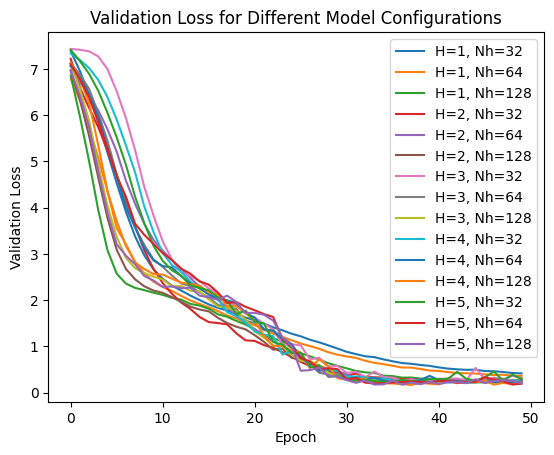

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load your simulation data
# Replace "your_dataset.csv" with the path to your dataset
df = pd.read_csv(r"C:\Users\krish\ai-power-converter\machine-learning\simulation_results_adjusted_1000.csv")

# Extract input features (L, C, fsw)
X = df[['L', 'C', 'fsw']].values

# Extract output (ripples)
y = df[["delta_current", "delta_voltage", "Pl_s1", "Pl_s2", "Pl_C", "Pl_L_Cu"]].values  # Adjust column names as per your dataset

# Scale input features to range [0, 1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define a custom callback to print custom information at the end of each epoch
class PrintEpochInfo(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch+1}/{self.params['epochs']}, Loss: {logs['loss']}, Val Loss: {logs['val_loss']}")

# Initialize a dictionary to store the training history for each configuration
histories = {}

# Define a list of different values for H and Nh to try
H_values = [1, 2, 3, 4, 5]  # Number of hidden layers
Nh_values = [32, 64, 128]  # Number of neurons per hidden layer

# Iterate over different values of H and Nh
for H in H_values:
    for Nh in Nh_values:
        # Initialize a Sequential model
        model = tf.keras.Sequential()

        # Add the first hidden layer with batch normalization
        model.add(tf.keras.layers.Dense(Nh, activation='relu', input_shape=(3,)))  
        model.add(tf.keras.layers.BatchNormalization())

        # Add subsequent hidden layers with batch normalization
        for _ in range(H - 1):
            model.add(tf.keras.layers.Dense(Nh, activation='relu'))
            model.add(tf.keras.layers.BatchNormalization())

        # Output layer (assuming it follows the hidden layers)
        model.add(tf.keras.layers.Dense(6))  

        # Compile the model
        model.compile(optimizer='adam', loss='mean_squared_error')

        # Train the model and store the training history
        history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=0, callbacks=[PrintEpochInfo()])
        histories[(H, Nh)] = history

# Plot the validation loss for each configuration
for (H, Nh), history in histories.items():
    plt.plot(history.history['val_loss'], label=f'H={H}, Nh={Nh}')

plt.title('Validation Loss for Different Model Configurations')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()


# Using 8000 datasets

Epoch 1/50, Loss: 4.000224590301514, Val Loss: 2.4416539669036865
Epoch 2/50, Loss: 0.9590243697166443, Val Loss: 1.1103712320327759
Epoch 3/50, Loss: 0.5824030637741089, Val Loss: 0.8053493499755859
Epoch 4/50, Loss: 0.48395922780036926, Val Loss: 0.5946395397186279
Epoch 5/50, Loss: 0.4250212609767914, Val Loss: 0.4419439733028412
Epoch 6/50, Loss: 0.3872239589691162, Val Loss: 0.3758484423160553
Epoch 7/50, Loss: 0.3596508502960205, Val Loss: 0.34025293588638306
Epoch 8/50, Loss: 0.3311384916305542, Val Loss: 0.3066115081310272
Epoch 9/50, Loss: 0.30795490741729736, Val Loss: 0.2847454249858856
Epoch 10/50, Loss: 0.2996583878993988, Val Loss: 0.2591105103492737
Epoch 11/50, Loss: 0.29023343324661255, Val Loss: 0.24682387709617615
Epoch 12/50, Loss: 0.27414199709892273, Val Loss: 0.24054236710071564
Epoch 13/50, Loss: 0.26075881719589233, Val Loss: 0.23629119992256165
Epoch 14/50, Loss: 0.2520974278450012, Val Loss: 0.2141672968864441
Epoch 15/50, Loss: 0.24940858781337738, Val Loss:

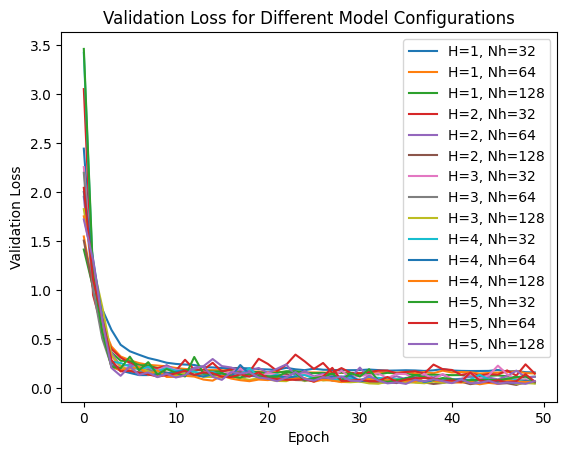

In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load your simulation data
# Replace "your_dataset.csv" with the path to your dataset
df = pd.read_csv(r"C:\Users\krish\ai-power-converter\machine-learning\modified_8000_dataset.csv")

# Extract input features (L, C, fsw)
X = df[['L', 'C', 'fsw']].values

# Extract output (ripples)
y = df[["delta_current", "delta_voltage", "Pl_s1", "Pl_s2", "Pl_C", "Pl_L_Cu"]].values  # Adjust column names as per your dataset

# Scale input features to range [0, 1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define a custom callback to print custom information at the end of each epoch
class PrintEpochInfo(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch+1}/{self.params['epochs']}, Loss: {logs['loss']}, Val Loss: {logs['val_loss']}")

# Initialize a dictionary to store the training history for each configuration
histories = {}

# Define a list of different values for H and Nh to try
H_values = [1, 2, 3, 4, 5]  # Number of hidden layers
Nh_values = [32, 64, 128]  # Number of neurons per hidden layer

# Iterate over different values of H and Nh
for H in H_values:
    for Nh in Nh_values:
        # Initialize a Sequential model
        model = tf.keras.Sequential()

        # Add the first hidden layer with batch normalization
        model.add(tf.keras.layers.Dense(Nh, activation='relu', input_shape=(3,)))  
        model.add(tf.keras.layers.BatchNormalization())

        # Add subsequent hidden layers with batch normalization
        for _ in range(H - 1):
            model.add(tf.keras.layers.Dense(Nh, activation='relu'))
            model.add(tf.keras.layers.BatchNormalization())

        # Output layer (assuming it follows the hidden layers)
        model.add(tf.keras.layers.Dense(6))  

        # Compile the model
        model.compile(optimizer='adam', loss='mean_squared_error')

        # Train the model and store the training history
        history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=0, callbacks=[PrintEpochInfo()])
        histories[(H, Nh)] = history

# Plot the validation loss for each configuration
for (H, Nh), history in histories.items():
    plt.plot(history.history['val_loss'], label=f'H={H}, Nh={Nh}')

plt.title('Validation Loss for Different Model Configurations')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()


# Add mse calculation for each loop

Epoch 1/50, Loss: 4.779433727264404, Val Loss: 3.8208227157592773
Epoch 2/50, Loss: 1.6179463863372803, Val Loss: 1.2545995712280273
Epoch 3/50, Loss: 0.6404293179512024, Val Loss: 0.8004977107048035
Epoch 4/50, Loss: 0.5614108443260193, Val Loss: 0.6330313086509705
Epoch 5/50, Loss: 0.5369032025337219, Val Loss: 0.5857477784156799
Epoch 6/50, Loss: 0.49172013998031616, Val Loss: 0.5132291316986084
Epoch 7/50, Loss: 0.4502677619457245, Val Loss: 0.4703316390514374
Epoch 8/50, Loss: 0.4321454167366028, Val Loss: 0.4077532887458801
Epoch 9/50, Loss: 0.39092549681663513, Val Loss: 0.3870818018913269
Epoch 10/50, Loss: 0.3739950656890869, Val Loss: 0.36001965403556824
Epoch 11/50, Loss: 0.3643627166748047, Val Loss: 0.3315844237804413
Epoch 12/50, Loss: 0.34316468238830566, Val Loss: 0.32116106152534485
Epoch 13/50, Loss: 0.33366355299949646, Val Loss: 0.31188249588012695
Epoch 14/50, Loss: 0.3269692659378052, Val Loss: 0.28659942746162415
Epoch 15/50, Loss: 0.3149586617946625, Val Loss: 0

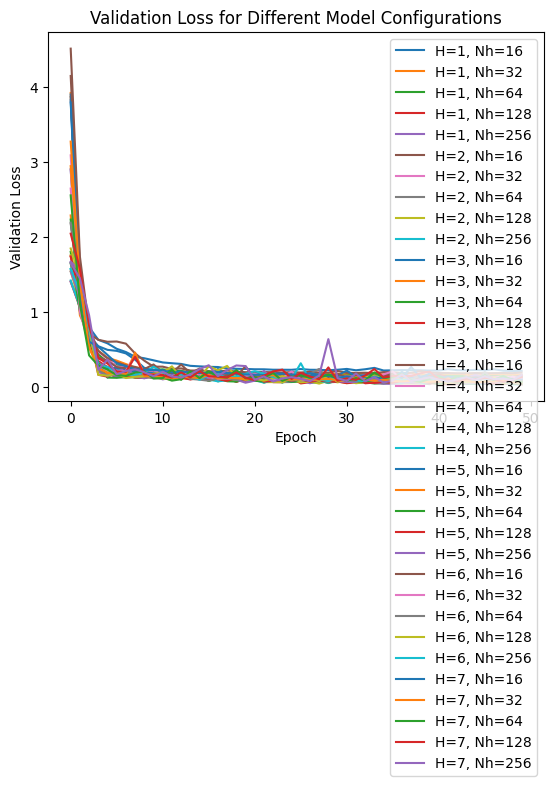

Model with H=1 and Nh=16: MSE=0.20237427949905396
Model with H=1 and Nh=32: MSE=0.16240252554416656
Model with H=1 and Nh=64: MSE=0.13322898745536804
Model with H=1 and Nh=128: MSE=0.12470004707574844
Model with H=1 and Nh=256: MSE=0.12104032933712006
Model with H=2 and Nh=16: MSE=0.17793463170528412
Model with H=2 and Nh=32: MSE=0.12686656415462494
Model with H=2 and Nh=64: MSE=0.046396784484386444
Model with H=2 and Nh=128: MSE=0.03990504518151283
Model with H=2 and Nh=256: MSE=0.02902258187532425
Model with H=3 and Nh=16: MSE=0.12709613144397736
Model with H=3 and Nh=32: MSE=0.05311198532581329
Model with H=3 and Nh=64: MSE=0.03824661299586296
Model with H=3 and Nh=128: MSE=0.02995028905570507
Model with H=3 and Nh=256: MSE=0.08202406764030457
Model with H=4 and Nh=16: MSE=0.09262903779745102
Model with H=4 and Nh=32: MSE=0.08216354250907898
Model with H=4 and Nh=64: MSE=0.0652853325009346
Model with H=4 and Nh=128: MSE=0.05657313019037247
Model with H=4 and Nh=256: MSE=0.0317346975

In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load your simulation data
# Replace "your_dataset.csv" with the path to your dataset
df = pd.read_csv(r"D:\Krishna\ai-power-converter\machine-learning\modified_8000_dataset.csv")

# Extract input features (L, C, fsw)
X = df[['L', 'C', 'fsw']].values

# Extract output (ripples)
y = df[["delta_current", "delta_voltage", "Pl_s1", "Pl_s2", "Pl_C", "Pl_L_Cu"]].values  # Adjust column names as per your dataset

# Scale input features to range [0, 1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define a custom callback to print custom information at the end of each epoch
class PrintEpochInfo(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch+1}/{self.params['epochs']}, Loss: {logs['loss']}, Val Loss: {logs['val_loss']}")

# Initialize a dictionary to store the training history for each configuration
histories = {}
mses = {}

# Define a list of different values for H and Nh to try
# H_values = [1, 2, 3, 4, 5]  # Number of hidden layers
# Nh_values = [32, 64, 128]  # Number of neurons per hidden layer
# Additional values for H and Nh
H_values = [1, 2, 3, 4, 5, 6, 7]  # Number of hidden layers
Nh_values = [16, 32, 64, 128, 256]  # Number of neurons per hidden layer


# Iterate over different values of H and Nh
for H in H_values:
    for Nh in Nh_values:
        # Initialize a Sequential model
        model = tf.keras.Sequential()

        # Add the first hidden layer with batch normalization
        model.add(tf.keras.layers.Dense(Nh, activation='relu', input_shape=(3,)))  
        model.add(tf.keras.layers.BatchNormalization())

        # Add subsequent hidden layers with batch normalization
        for _ in range(H - 1):
            model.add(tf.keras.layers.Dense(Nh, activation='relu'))
            model.add(tf.keras.layers.BatchNormalization())

        # Output layer (assuming it follows the hidden layers)
        model.add(tf.keras.layers.Dense(6))  

        # Compile the model
        model.compile(optimizer='adam', loss='mean_squared_error')

        # Train the model and store the training history
        history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=0, callbacks=[PrintEpochInfo()])
        histories[(H, Nh)] = history

        # Evaluate the model on the testing set and calculate MSE
        mse = model.evaluate(X_test, y_test)
        mses[(H, Nh)] = mse

# Plot the validation loss for each configuration
for (H, Nh), history in histories.items():
    plt.plot(history.history['val_loss'], label=f'H={H}, Nh={Nh}')

plt.title('Validation Loss for Different Model Configurations')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

# Print the MSE for each configuration
for (H, Nh), mse in mses.items():
    print(f'Model with H={H} and Nh={Nh}: MSE={mse}')


# Add other measurement too

Epoch 1/50, Loss: 4.2599616050720215, Val Loss: 2.5458407402038574
Epoch 2/50, Loss: 1.4159724712371826, Val Loss: 1.0068979263305664
Epoch 3/50, Loss: 0.6475341320037842, Val Loss: 0.8219717144966125
Epoch 4/50, Loss: 0.561486005783081, Val Loss: 0.6375229358673096
Epoch 5/50, Loss: 0.49901819229125977, Val Loss: 0.5027492046356201
Epoch 6/50, Loss: 0.446808397769928, Val Loss: 0.4230269193649292
Epoch 7/50, Loss: 0.41713282465934753, Val Loss: 0.37499484419822693
Epoch 8/50, Loss: 0.3801662027835846, Val Loss: 0.34922608733177185
Epoch 9/50, Loss: 0.3490196168422699, Val Loss: 0.3255494236946106
Epoch 10/50, Loss: 0.33968791365623474, Val Loss: 0.30885225534439087
Epoch 11/50, Loss: 0.327693909406662, Val Loss: 0.29392892122268677
Epoch 12/50, Loss: 0.3154951333999634, Val Loss: 0.2858152389526367
Epoch 13/50, Loss: 0.3162456154823303, Val Loss: 0.27573972940444946
Epoch 14/50, Loss: 0.3021398186683655, Val Loss: 0.2760961949825287
Epoch 15/50, Loss: 0.2978682518005371, Val Loss: 0.2

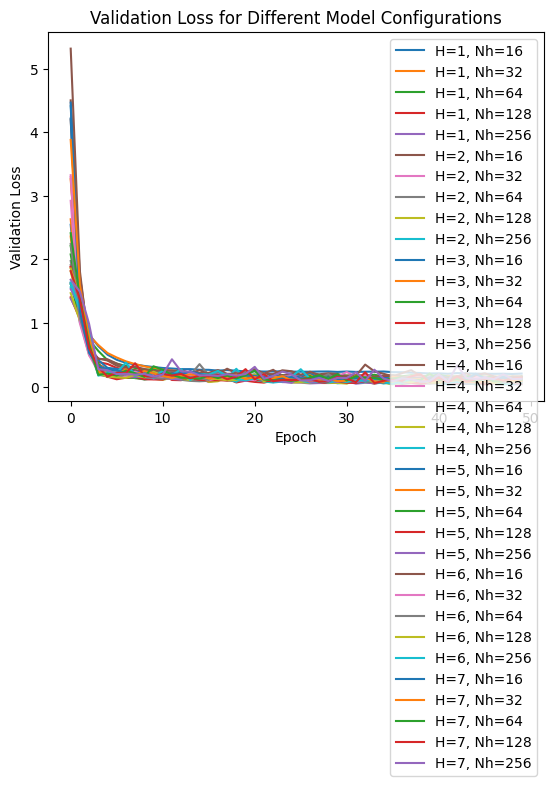

Model with H=1 and Nh=16:
MSE: 0.20237427949905396
MAE: 0.17948045088794332
RMSE: 0.4309693140587862
R-squared: 0.8143073022746926
MAPE: 49.690645017171846%

Model with H=1 and Nh=32:
MSE: 0.16240252554416656
MAE: 0.16612908905149806
RMSE: 0.3936646595312409
R-squared: 0.8565974563447808
MAPE: 39.00509918309874%

Model with H=1 and Nh=64:
MSE: 0.13322898745536804
MAE: 0.15130947342231596
RMSE: 0.38513680069789535
R-squared: 0.8398656246606057
MAPE: 49.34791510848551%

Model with H=1 and Nh=128:
MSE: 0.12470004707574844
MAE: 0.13119968815594665
RMSE: 0.3488758193912162
R-squared: 0.9057074624236794
MAPE: 28.37016299773701%

Model with H=1 and Nh=256:
MSE: 0.12104032933712006
MAE: 0.151299777027589
RMSE: 0.2916269575237759
R-squared: 0.7586609094694087
MAPE: 76.60608145521137%

Model with H=2 and Nh=16:
MSE: 0.17793463170528412
MAE: 0.15821563955710838
RMSE: 0.3187204767495935
R-squared: 0.8232339953111065
MAPE: 48.34991062015697%

Model with H=2 and Nh=32:
MSE: 0.12686656415462494
MAE: 

In [8]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load your simulation data
# Replace "your_dataset.csv" with the path to your dataset
df = pd.read_csv(r"D:\Krishna\ai-power-converter\machine-learning\modified_8000_dataset.csv")

# Extract input features (L, C, fsw)
X = df[['L', 'C', 'fsw']].values

# Extract output (ripples)
y = df[["delta_current", "delta_voltage", "Pl_s1", "Pl_s2", "Pl_C", "Pl_L_Cu"]].values  # Adjust column names as per your dataset

# Scale input features to range [0, 1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define a custom callback to print custom information at the end of each epoch
class PrintEpochInfo(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch+1}/{self.params['epochs']}, Loss: {logs['loss']}, Val Loss: {logs['val_loss']}")

# Initialize a dictionary to store the training history for each configuration
histories = {}

# Initialize dictionaries to store the evaluation metrics for each configuration
maes = {}
rmses = {}
r2_scores = {}
mapes = {}

# Define a list of different values for H and Nh to try
# H_values = [1, 2, 3, 4, 5]  # Number of hidden layers
# Nh_values = [32, 64, 128]  # Number of neurons per hidden layer
# Additional values for H and Nh
H_values = [1, 2, 3, 4, 5, 6, 7]  # Number of hidden layers
Nh_values = [16, 32, 64, 128, 256]  # Number of neurons per hidden layer


# Iterate over different values of H and Nh
for H in H_values:
    for Nh in Nh_values:
        # Initialize a Sequential model
        model = tf.keras.Sequential()

        # Add the first hidden layer with batch normalization
        model.add(tf.keras.layers.Dense(Nh, activation='relu', input_shape=(3,)))  
        model.add(tf.keras.layers.BatchNormalization())

        # Add subsequent hidden layers with batch normalization
        for _ in range(H - 1):
            model.add(tf.keras.layers.Dense(Nh, activation='relu'))
            model.add(tf.keras.layers.BatchNormalization())

        # Output layer (assuming it follows the hidden layers)
        model.add(tf.keras.layers.Dense(6))  

        # Compile the model
        model.compile(optimizer='adam', loss='mean_squared_error')

        # Train the model and store the training history
        history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=0, callbacks=[PrintEpochInfo()])
        histories[(H, Nh)] = history

        # Evaluate the model on the testing set
        predictions = model.predict(X_test)

        # Calculate Mean Absolute Error (MAE)
        mae = mean_absolute_error(y_test, predictions)
        maes[(H, Nh)] = mae

        # Calculate Root Mean Squared Error (RMSE)
        rmse = np.sqrt(mean_squared_error(y_test, predictions))
        rmses[(H, Nh)] = rmse

        # Calculate R-squared (R2) Score
        r2 = r2_score(y_test, predictions)
        r2_scores[(H, Nh)] = r2

        # Calculate Mean Absolute Percentage Error (MAPE)
        mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
        mapes[(H, Nh)] = mape

# Plot the validation loss for each configuration
for (H, Nh), history in histories.items():
    plt.plot(history.history['val_loss'], label=f'H={H}, Nh={Nh}')

plt.title('Validation Loss for Different Model Configurations')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

# Print the MSE for each configuration
# Print the evaluation metrics for each configuration
for (H, Nh), mse in mses.items():
    print(f'Model with H={H} and Nh={Nh}:')
    print(f'MSE: {mse}')
    print(f'MAE: {maes[(H, Nh)]}')
    print(f'RMSE: {rmses[(H, Nh)]}')
    print(f'R-squared: {r2_scores[(H, Nh)]}')
    print(f'MAPE: {mapes[(H, Nh)]}%')
    print()


In [9]:
# Sort configurations based on evaluation metrics
sorted_configs_mse = sorted(mses.items(), key=lambda x: x[1])
sorted_configs_mae = sorted(maes.items(), key=lambda x: x[1])
sorted_configs_rmse = sorted(rmses.items(), key=lambda x: x[1])
sorted_configs_r2 = sorted(r2_scores.items(), key=lambda x: x[1], reverse=True)
sorted_configs_mape = sorted(mapes.items(), key=lambda x: x[1])

# Print sorted configurations
print("Sorted Configurations based on MSE:")
for (H, Nh), mse in sorted_configs_mse:
    print(f'Model with H={H} and Nh={Nh}: MSE={mse}')

print("\nSorted Configurations based on MAE:")
for (H, Nh), mae in sorted_configs_mae:
    print(f'Model with H={H} and Nh={Nh}: MAE={mae}')

print("\nSorted Configurations based on RMSE:")
for (H, Nh), rmse in sorted_configs_rmse:
    print(f'Model with H={H} and Nh={Nh}: RMSE={rmse}')

print("\nSorted Configurations based on R-squared:")
for (H, Nh), r2 in sorted_configs_r2:
    print(f'Model with H={H} and Nh={Nh}: R-squared={r2}')

print("\nSorted Configurations based on MAPE:")
for (H, Nh), mape in sorted_configs_mape:
    print(f'Model with H={H} and Nh={Nh}: MAPE={mape}%')


Sorted Configurations based on MSE:
Model with H=6 and Nh=128: MSE=0.02748357132077217
Model with H=2 and Nh=256: MSE=0.02902258187532425
Model with H=3 and Nh=128: MSE=0.02995028905570507
Model with H=4 and Nh=256: MSE=0.03173469752073288
Model with H=5 and Nh=256: MSE=0.03356430307030678
Model with H=5 and Nh=64: MSE=0.037041906267404556
Model with H=6 and Nh=256: MSE=0.03778288513422012
Model with H=3 and Nh=64: MSE=0.03824661299586296
Model with H=2 and Nh=128: MSE=0.03990504518151283
Model with H=5 and Nh=128: MSE=0.04329942539334297
Model with H=2 and Nh=64: MSE=0.046396784484386444
Model with H=7 and Nh=64: MSE=0.04719701036810875
Model with H=3 and Nh=32: MSE=0.05311198532581329
Model with H=4 and Nh=128: MSE=0.05657313019037247
Model with H=6 and Nh=64: MSE=0.05901719257235527
Model with H=7 and Nh=32: MSE=0.06025802716612816
Model with H=4 and Nh=64: MSE=0.0652853325009346
Model with H=7 and Nh=256: MSE=0.07096283882856369
Model with H=5 and Nh=32: MSE=0.07212886214256287
Mod

In [10]:
# Sort configurations based on MSE in ascending order
sorted_configs_mse = sorted(mses.items(), key=lambda x: x[1])

# Sort configurations based on MAE in ascending order
sorted_configs_mae = sorted(maes.items(), key=lambda x: x[1])

# Sort configurations based on RMSE in ascending order
sorted_configs_rmse = sorted(rmses.items(), key=lambda x: x[1])

# Sort configurations based on R-squared in descending order
sorted_configs_r2 = sorted(r2_scores.items(), key=lambda x: x[1], reverse=True)

# Sort configurations based on MAPE in ascending order
sorted_configs_mape = sorted(mapes.items(), key=lambda x: x[1])

# Rank each combination based on its position in the sorted lists
ranking = {}
for i, (config, _) in enumerate(sorted_configs_mse):
    ranking[config] = i + 1

for i, (config, _) in enumerate(sorted_configs_mae):
    ranking[config] += i + 1

for i, (config, _) in enumerate(sorted_configs_rmse):
    ranking[config] += i + 1

for i, (config, _) in enumerate(sorted_configs_r2):
    ranking[config] += i + 1

for i, (config, _) in enumerate(sorted_configs_mape):
    ranking[config] += i + 1

# Sort configurations based on their overall ranking
sorted_ranking = sorted(ranking.items(), key=lambda x: x[1])

# Display the rankings
for rank, (config, _) in enumerate(sorted_ranking, 1):
    print(f'{rank}. Combination {config}: Overall rank {rank}')


1. Combination (6, 128): Overall rank 1
2. Combination (3, 128): Overall rank 2
3. Combination (2, 256): Overall rank 3
4. Combination (3, 64): Overall rank 4
5. Combination (3, 256): Overall rank 5
6. Combination (5, 256): Overall rank 6
7. Combination (4, 128): Overall rank 7
8. Combination (4, 64): Overall rank 8
9. Combination (2, 64): Overall rank 9
10. Combination (6, 64): Overall rank 10
11. Combination (2, 128): Overall rank 11
12. Combination (4, 256): Overall rank 12
13. Combination (6, 32): Overall rank 13
14. Combination (5, 128): Overall rank 14
15. Combination (3, 32): Overall rank 15
16. Combination (7, 256): Overall rank 16
17. Combination (5, 32): Overall rank 17
18. Combination (6, 256): Overall rank 18
19. Combination (4, 32): Overall rank 19
20. Combination (7, 64): Overall rank 20
21. Combination (1, 128): Overall rank 21
22. Combination (7, 32): Overall rank 22
23. Combination (5, 64): Overall rank 23
24. Combination (4, 16): Overall rank 24
25. Combination (5, 16

In [11]:
# Specify the combination you want to call
H = 6
Nh = 128

# Retrieve the model for the specified combination
selected_model = histories[(H, Nh)].model

# Now you can use the selected_model for making predictions, evaluating, or any other operations.


In [12]:
# Use the trained model to make predictions on the testing set
predictions = selected_model.predict(X_test)

# Print the first few predictions
print("Predictions:")
print(predictions[:5])

# Print the corresponding true values
print("True Values:")
print(y_test[:5])

38/38 [==============================] - 0s 768us/step
Predictions:
[[0.24685803 4.5286484  2.6789558  2.6400435  0.03702883 1.2839668 ]
 [0.17988724 3.5578384  3.4170043  3.4256027  0.00634539 0.80800617]
 [0.24895287 4.6581917  3.3561943  3.305949   0.02762333 1.1996486 ]
 [0.1365357  3.5877955  2.3141856  2.3269708  0.05221421 2.2603543 ]
 [0.07464609 0.5862384  2.0455844  2.0621655  0.21514928 1.9508219 ]]
True Values:
[[0.26001435 4.23264405 2.74299141 2.74299141 0.01217656 1.29224261]
 [0.19503469 3.32206237 3.59940991 3.59940991 0.00902757 0.95760415]
 [0.23933468 4.23420079 3.51435724 3.51435724 0.00733677 1.291914  ]
 [0.08042573 4.24613856 2.40471154 2.40471154 0.02217949 2.34150863]
 [0.07897327 0.58997409 2.02413572 2.02413572 0.16765618 2.15456352]]


# Wanna try more combination

C:\Users\Krishna\AppData\Local\Temp\ipykernel_34984\377559489.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd






Epoch 1/50, Loss: 3.2996926307678223, Val Loss: 2.819453477859497
Epoch 2/50, Loss: 1.3614341020584106, Val Loss: 1.2670351266860962
Epoch 3/50, Loss: 0.7026934623718262, Val Loss: 0.9449461698532104
Epoch 4/50, Loss: 0.6281723976135254, Val Loss: 0.7699092626571655
Epoch 5/50, Loss: 0.6116365194320679, Val Loss: 0.7258635759353638
Epoch 6/50, Loss: 0.595930814743042, Val Loss: 0.7314271330833435
Epoch 7/50, Loss: 0.585752010345459, Val Loss: 0.6981366872787476
Epoch 8/50, Loss: 0.5811405777931213, Val Loss: 0.685655415058136
Epoch 9/50, Loss: 0.57267826795578, Val Loss: 0.6878861784934998
Epoch 10/50, Loss: 0.5586020946502686, Val Loss: 0.6661575436592102
Epoch 11/50, Loss: 0.563579261302948, Val Loss: 0.6592936515808105
Epoch 12/50, Loss: 0.5602090954780579, Val Loss: 0.6570084095001221
Epoch 13/50, Loss: 0.549624502658844, Val Loss: 0.6478993892669678
Epoch 14/50, Loss: 0.5511071085929871, Val Loss: 0.6417157053947449
Epoch 15/50, Loss: 0.5433863401412964, Val Loss: 0.6346301436

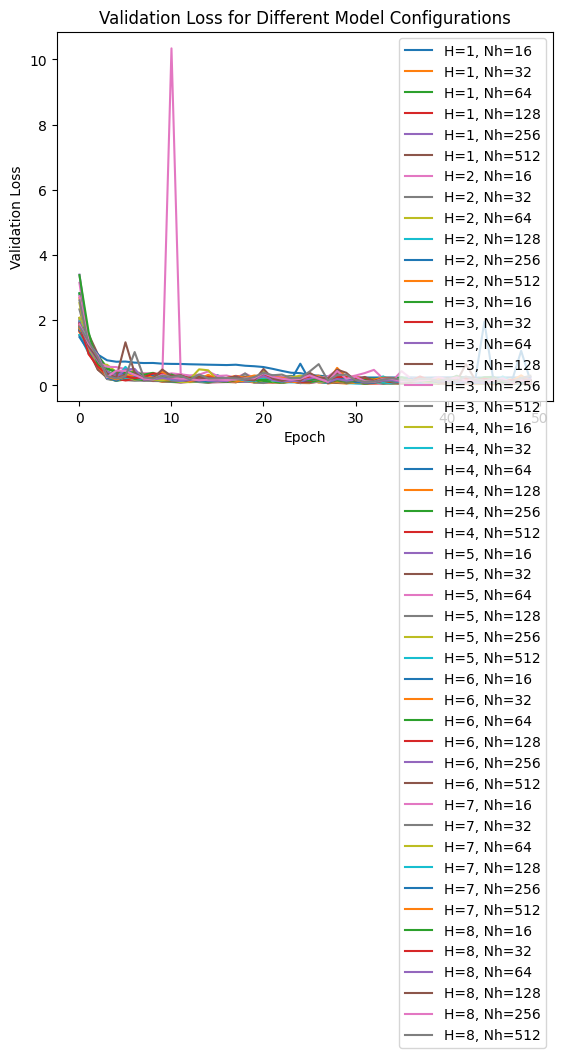

Model with H=1 and Nh=16:
MSE: 0.22386126220226288
MAE: 0.19407609908343834
RMSE: 0.47313977114016836
R-squared: 0.8651211310969057
MAPE: 21.409306569531044%
Model with H=1 and Nh=32:
MSE: 0.16356882452964783
MAE: 0.16086772267204238
RMSE: 0.4044364360900642
R-squared: 0.8965960755695436
MAPE: 18.056355560556938%
Model with H=1 and Nh=64:
MSE: 0.13646520674228668
MAE: 0.1427747709433145
RMSE: 0.36941196501053536
R-squared: 0.9147981995815729
MAPE: 17.76418247497129%
Model with H=1 and Nh=128:
MSE: 0.1273467242717743
MAE: 0.12932532686887957
RMSE: 0.356856726412243
R-squared: 0.9358459797744295
MAPE: 13.902454593797511%
Model with H=1 and Nh=256:
MSE: 0.10153879970312119
MAE: 0.1241740618339398
RMSE: 0.31865152958736026
R-squared: 0.9475124278731967
MAPE: 12.436942621181341%
Model with H=1 and Nh=512:
MSE: 0.08656042069196701
MAE: 0.11537812341351028
RMSE: 0.2942115166499174
R-squared: 0.9492071563851873
MAPE: 10.935154373300792%
Model with H=2 and Nh=16:
MSE: 0.1071109026670456
MAE: 0.

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Fix random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load your simulation data
# Replace "your_dataset.csv" with the path to your dataset
df = pd.read_csv(r"D:\Krishna\ai-power-converter\machine-learning\modified_8000_dataset.csv")

# Extract input features (L, C, fsw)
X = df[['L', 'C', 'fsw']].values

# Extract output (ripples)
y = df[["delta_current", "delta_voltage", "Pl_s1", "Pl_s2", "Pl_C", "Pl_L_Cu"]].values  # Adjust column names as per your dataset

# Scale input features to range [0, 1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define a custom callback to print custom information at the end of each epoch
class PrintEpochInfo(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch+1}/{self.params['epochs']}, Loss: {logs['loss']}, Val Loss: {logs['val_loss']}")

# Initialize a dictionary to store the training history for each configuration
histories = {}

# Initialize dictionaries to store the evaluation metrics for each configuration
mses = {}
maes = {}
rmses = {}
r2_scores = {}
mapes = {}

# Define a list of different values for H and Nh to try
# H_values = [1, 2, 3, 4, 5]  # Number of hidden layers
# Nh_values = [32, 64, 128]  # Number of neurons per hidden layer
# Additional values for H and Nh
# H_values = [1, 2, 3, 4, 5, 6, 7]  # Number of hidden layers
# Nh_values = [16, 32, 64, 128, 256]  # Number of neurons per hidden layer
H_values = [1, 2, 3, 4, 5, 6, 7, 8]  # Number of hidden layers
Nh_values = [16, 32, 64, 128, 256, 512]  # Number of neurons per hidden layer



# Iterate over different values of H and Nh
for H in H_values:
    for Nh in Nh_values:
        # Initialize a Sequential model
        model = tf.keras.Sequential()

        # Add the first hidden layer with batch normalization
        model.add(tf.keras.layers.Dense(Nh, activation='relu', input_shape=(3,)))  
        model.add(tf.keras.layers.BatchNormalization())

        # Add subsequent hidden layers with batch normalization
        for _ in range(H - 1):
            model.add(tf.keras.layers.Dense(Nh, activation='relu'))
            model.add(tf.keras.layers.BatchNormalization())

        # Output layer (assuming it follows the hidden layers)
        model.add(tf.keras.layers.Dense(6, activation='softplus'))  

        # Compile the model
        model.compile(optimizer='adam', loss='mean_squared_error')

        # Train the model and store the training history
        history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=0, callbacks=[PrintEpochInfo()])
        histories[(H, Nh)] = history

        # Evaluate the model on the testing set
        predictions = model.predict(X_test)

        # Evaluate the model on the testing set and calculate MSE
        mse = model.evaluate(X_test, y_test)
        mses[(H, Nh)] = mse

        # Calculate Mean Absolute Error (MAE)
        mae = mean_absolute_error(y_test, predictions)
        maes[(H, Nh)] = mae

        # Calculate Root Mean Squared Error (RMSE)
        rmse = np.sqrt(mean_squared_error(y_test, predictions))
        rmses[(H, Nh)] = rmse

        # Calculate R-squared (R2) Score
        r2 = r2_score(y_test, predictions)
        r2_scores[(H, Nh)] = r2

        # Calculate Mean Absolute Percentage Error (MAPE)
        mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
        mapes[(H, Nh)] = mape

# Plot the validation loss for each configuration
for (H, Nh), history in histories.items():
    plt.plot(history.history['val_loss'], label=f'H={H}, Nh={Nh}')

plt.title('Validation Loss for Different Model Configurations')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

# Print the MSE for each configuration
# Print the evaluation metrics for each configuration
for (H, Nh), mse in mses.items():
    print(f'Model with H={H} and Nh={Nh}:')
    print(f'MSE: {mse}')
    print(f'MAE: {maes[(H, Nh)]}')
    print(f'RMSE: {rmses[(H, Nh)]}')
    print(f'R-squared: {r2_scores[(H, Nh)]}')
    print(f'MAPE: {mapes[(H, Nh)]}%')


In [2]:
# Sort configurations based on MSE in ascending order
sorted_configs_mse = sorted(mses.items(), key=lambda x: x[1])

# Sort configurations based on MAE in ascending order
sorted_configs_mae = sorted(maes.items(), key=lambda x: x[1])

# Sort configurations based on RMSE in ascending order
sorted_configs_rmse = sorted(rmses.items(), key=lambda x: x[1])

# Sort configurations based on R-squared in descending order
sorted_configs_r2 = sorted(r2_scores.items(), key=lambda x: x[1], reverse=True)

# Sort configurations based on MAPE in ascending order
sorted_configs_mape = sorted(mapes.items(), key=lambda x: x[1])

# Rank each combination based on its position in the sorted lists
ranking = {}
for i, (config, _) in enumerate(sorted_configs_mse):
    ranking[config] = i + 1

for i, (config, _) in enumerate(sorted_configs_mae):
    ranking[config] += i + 1

for i, (config, _) in enumerate(sorted_configs_rmse):
    ranking[config] += i + 1

for i, (config, _) in enumerate(sorted_configs_r2):
    ranking[config] += i + 1

for i, (config, _) in enumerate(sorted_configs_mape):
    ranking[config] += i + 1

# Sort configurations based on their overall ranking
sorted_ranking = sorted(ranking.items(), key=lambda x: x[1])

# Display the rankings
for rank, (config, _) in enumerate(sorted_ranking, 1):
    print(f'{rank}. Combination {config}: Overall rank {rank}')


1. Combination (4, 128): Overall rank 1
2. Combination (2, 128): Overall rank 2
3. Combination (2, 256): Overall rank 3
4. Combination (3, 128): Overall rank 4
5. Combination (3, 256): Overall rank 5
6. Combination (3, 512): Overall rank 6
7. Combination (4, 64): Overall rank 7
8. Combination (5, 128): Overall rank 8
9. Combination (2, 512): Overall rank 9
10. Combination (4, 256): Overall rank 10
11. Combination (6, 128): Overall rank 11
12. Combination (7, 128): Overall rank 12
13. Combination (7, 256): Overall rank 13
14. Combination (4, 512): Overall rank 14
15. Combination (2, 64): Overall rank 15
16. Combination (1, 512): Overall rank 16
17. Combination (2, 32): Overall rank 17
18. Combination (6, 64): Overall rank 18
19. Combination (3, 64): Overall rank 19
20. Combination (5, 32): Overall rank 20
21. Combination (1, 256): Overall rank 21
22. Combination (3, 32): Overall rank 22
23. Combination (6, 512): Overall rank 23
24. Combination (5, 512): Overall rank 24
25. Combination (

In [7]:
# Specify the combination you want to call
H = 5
Nh = 512

# Retrieve the model for the specified combination
selected_model = histories[(H, Nh)].model

# Now you can use the selected_model for making predictions, evaluating, or any other operations.


In [8]:
# Use the trained model to make predictions on the testing set
predictions = selected_model.predict(X_test)

# Print the first few predictions
print("Predictions:")
print(predictions[:5])

# Print the corresponding true values
print("True Values:")
print(y_test[:5])

38/38 [==============================] - 0s 1ms/step
Predictions:
[[0.19412751 4.707816   2.762151   2.764543   0.01443037 1.3095285 ]
 [0.11944473 3.365606   3.704121   3.7395468  0.00822505 0.97772545]
 [0.15721671 4.4107094  3.5538127  3.5642672  0.0072273  1.2667242 ]
 [0.08920763 4.329439   2.3383327  2.3208897  0.03342998 2.324272  ]
 [0.07430311 0.63782054 2.086364   2.032329   0.18593319 2.0206852 ]]
True Values:
[[0.26001435 4.23264405 2.74299141 2.74299141 0.01217656 1.29224261]
 [0.19503469 3.32206237 3.59940991 3.59940991 0.00902757 0.95760415]
 [0.23933468 4.23420079 3.51435724 3.51435724 0.00733677 1.291914  ]
 [0.08042573 4.24613856 2.40471154 2.40471154 0.02217949 2.34150863]
 [0.07897327 0.58997409 2.02413572 2.02413572 0.16765618 2.15456352]]


1. Combination (5, 512): Overall rank 1
2. Combination (4, 128): Overall rank 2
3. Combination (3, 64): Overall rank 3
4. Combination (2, 256): Overall rank 4
5. Combination (3, 128): Overall rank 5
6. Combination (3, 512): Overall rank 6
7. Combination (6, 256): Overall rank 7
8. Combination (5, 128): Overall rank 8
9. Combination (3, 256): Overall rank 9
10. Combination (7, 512): Overall rank 10

1. Combination (5, 256): Overall rank 1
2. Combination (2, 256): Overall rank 2
3. Combination (3, 256): Overall rank 3
4. Combination (4, 128): Overall rank 4
5. Combination (4, 512): Overall rank 5
6. Combination (5, 128): Overall rank 6
7. Combination (4, 256): Overall rank 7
8. Combination (5, 512): Overall rank 8
9. Combination (3, 128): Overall rank 9
10. Combination (2, 128): Overall rank 10

1. Combination (3, 128): Overall rank 1
2. Combination (4, 512): Overall rank 2
3. Combination (4, 256): Overall rank 3
4. Combination (4, 128): Overall rank 4
5. Combination (3, 512): Overall rank 5
6. Combination (2, 256): Overall rank 6
7. Combination (3, 256): Overall rank 7
8. Combination (6, 128): Overall rank 8
9. Combination (4, 64): Overall rank 9
10. Combination (5, 128): Overall rank 10

Using fix random:
1. Combination (3, 128): Overall rank 1
2. Combination (2, 512): Overall rank 2
3. Combination (2, 128): Overall rank 3
4. Combination (2, 256): Overall rank 4
5. Combination (4, 128): Overall rank 5
6. Combination (4, 64): Overall rank 6
7. Combination (3, 256): Overall rank 7
8. Combination (5, 512): Overall rank 8
9. Combination (3, 64): Overall rank 9
10. Combination (6, 256): Overall rank 10

1. Combination (2, 128): Overall rank 1
2. Combination (3, 256): Overall rank 2
3. Combination (5, 256): Overall rank 3
4. Combination (2, 64): Overall rank 4
5. Combination (4, 256): Overall rank 5
6. Combination (3, 512): Overall rank 6
7. Combination (2, 512): Overall rank 7
8. Combination (5, 128): Overall rank 8
9. Combination (4, 512): Overall rank 9
10. Combination (3, 64): Overall rank 10

1. Combination (5, 256): Overall rank 1
2. Combination (2, 256): Overall rank 2
3. Combination (4, 128): Overall rank 3
4. Combination (3, 256): Overall rank 4
5. Combination (4, 512): Overall rank 5
6. Combination (3, 512): Overall rank 6
7. Combination (4, 256): Overall rank 7
8. Combination (4, 64): Overall rank 8
9. Combination (3, 128): Overall rank 9
10. Combination (2, 512): Overall rank 10

# Using another approach

Epoch 1/50, Loss: 2.9790356159210205, Val Loss: 2.3396902084350586
Epoch 2/50, Loss: 1.178325891494751, Val Loss: 1.0216996669769287
Epoch 3/50, Loss: 0.6653050780296326, Val Loss: 0.8359582424163818
Epoch 4/50, Loss: 0.46230992674827576, Val Loss: 0.5069458484649658
Epoch 5/50, Loss: 0.40351036190986633, Val Loss: 0.38204994797706604
Epoch 6/50, Loss: 0.3749523460865021, Val Loss: 0.345023512840271
Epoch 7/50, Loss: 0.35352805256843567, Val Loss: 0.3265582323074341
Epoch 8/50, Loss: 0.33213967084884644, Val Loss: 0.29341018199920654
Epoch 9/50, Loss: 0.32306262850761414, Val Loss: 0.28013914823532104
Epoch 10/50, Loss: 0.3191942274570465, Val Loss: 0.27209314703941345
Epoch 11/50, Loss: 0.31163865327835083, Val Loss: 0.2629467248916626
Epoch 12/50, Loss: 0.2908358871936798, Val Loss: 0.2527258098125458
Epoch 13/50, Loss: 0.2883222699165344, Val Loss: 0.24807925522327423
Epoch 14/50, Loss: 0.28765028715133667, Val Loss: 0.2487182319164276
Epoch 15/50, Loss: 0.2824481427669525, Val Loss

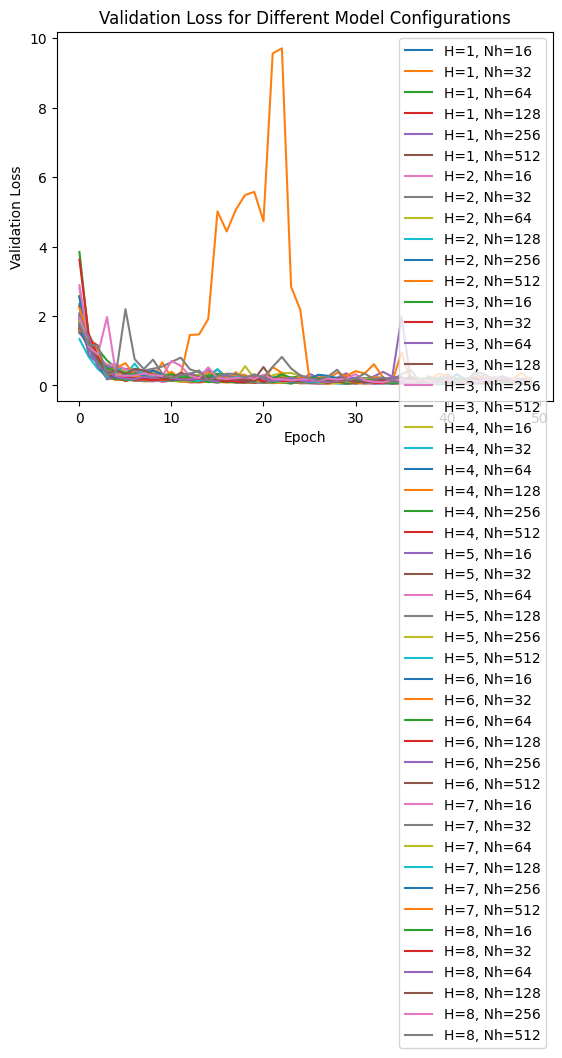

Model with H=1 and Nh=16:
MSE: 0.18327632546424866
Model with H=1 and Nh=32:
MSE: 0.1345856934785843
Model with H=1 and Nh=64:
MSE: 0.17345410585403442
Model with H=1 and Nh=128:
MSE: 0.0872093066573143
Model with H=1 and Nh=256:
MSE: 0.08574023842811584
Model with H=1 and Nh=512:
MSE: 0.08624162524938583
Model with H=2 and Nh=16:
MSE: 0.16889964044094086
Model with H=2 and Nh=32:
MSE: 0.1404235064983368
Model with H=2 and Nh=64:
MSE: 0.05767721310257912
Model with H=2 and Nh=128:
MSE: 0.03895915672183037
Model with H=2 and Nh=256:
MSE: 0.04410465061664581
Model with H=2 and Nh=512:
MSE: 0.04236801341176033
Model with H=3 and Nh=16:
MSE: 0.1096949651837349
Model with H=3 and Nh=32:
MSE: 0.053287822753190994
Model with H=3 and Nh=64:
MSE: 0.039279136806726456
Model with H=3 and Nh=128:
MSE: 0.022758210077881813
Model with H=3 and Nh=256:
MSE: 0.022136347368359566
Model with H=3 and Nh=512:
MSE: 0.03282662853598595
Model with H=4 and Nh=16:
MSE: 0.09470197558403015
Model with H=4 and Nh=

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


# Load your simulation data
# Replace "your_dataset.csv" with the path to your dataset
df = pd.read_csv(r"D:\Krishna\ai-power-converter\machine-learning\modified_8000_dataset.csv")

# Extract input features (L, C, fsw)
X = df[['L', 'C', 'fsw']].values

# Extract output (ripples)
y = df[["delta_current", "delta_voltage", "Pl_s1", "Pl_s2", "Pl_C", "Pl_L_Cu"]].values  # Adjust column names as per your dataset

# Scale input features to range [0, 1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define a custom callback to print custom information at the end of each epoch
class PrintEpochInfo(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch+1}/{self.params['epochs']}, Loss: {logs['loss']}, Val Loss: {logs['val_loss']}")

# Initialize a dictionary to store the training history for each configuration
histories = {}

# Initialize a dictionary to store the MSE for each configuration
mses = {}

# Define a list of different values for H and Nh to try
H_values = [1, 2, 3, 4, 5, 6, 7, 8]  # Number of hidden layers
Nh_values = [16, 32, 64, 128, 256, 512]  # Number of neurons per hidden layer

best_score = float('inf')  # Initialize the best score to positive infinity
best_architecture = None   # Initialize the best architecture
# Iterate over different values of H and Nh
for H in H_values:
    for Nh in Nh_values:
        # Initialize a Sequential model
        model = tf.keras.Sequential()

        # Add the first hidden layer with batch normalization
        model.add(tf.keras.layers.Dense(Nh, activation='relu', input_shape=(3,)))  
        model.add(tf.keras.layers.BatchNormalization())

        # Add subsequent hidden layers with batch normalization
        for _ in range(H - 1):
            model.add(tf.keras.layers.Dense(Nh, activation='relu'))
            model.add(tf.keras.layers.BatchNormalization())

        # Output layer (assuming it follows the hidden layers)
        model.add(tf.keras.layers.Dense(6, activation='softplus'))  

        # Compile the model
        model.compile(optimizer='adam', loss='mean_squared_error')

        # Train the model and store the training history
        history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=0, callbacks=[PrintEpochInfo()])
        histories[(H, Nh)] = history

        # Evaluate the model on the testing set and calculate MSE
        mse = model.evaluate(X_test, y_test)
        mses[(H, Nh)] = mse

                # Update the best architecture if the current one performs better
        if mse < best_score:
            best_score = mse
            best_architecture = (Nh, H)

# Plot the validation loss for each configuration
for (H, Nh), history in histories.items():
    plt.plot(history.history['val_loss'], label=f'H={H}, Nh={Nh}')

plt.title('Validation Loss for Different Model Configurations')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

# Print the MSE for each configuration
for (H, Nh), mse in mses.items():
    print(f'Model with H={H} and Nh={Nh}:')
    print(f'MSE: {mse}')


print(f"Best architecture: {best_architecture}, Best score: {best_score}")